# Coursework 1 - Mathematics for Machine Learning

## CID: insert your CID here

**Colab link:** insert colab link here

***
***

## Part 1: Quickfire questions [3 points]

#### Question 1 (True risk / Empirical risk):

Given samples and data distribution $(\textbf{x}, \textbf{y}) \sim D$, a hypothesis class and function, $f \in \hat{\mathcal{F}}$, where $f:X \rightarrow Y$ where $X$ is input space and $Y$ is output space, and loss function $L$, the true risk is

$$
R(f) := \mathbb{E}_D[L(f(\textbf{x}), \textbf{y})]\,.
$$
The real risk measures the expected value of the loss function over the sample distribution, hence giving an estimate to how good our model $f$ is.

Since $D$ is usually unkown, we resort to computing the empirical risk, using $N$ samples $(\textbf{x}_i, \textbf{y}_i)$ that we do posses, 

$$
\hat{R}(f) := \frac{1}{N}\sum_i^N{L(f(\textbf{x}_i), \textbf{y}_i)}\, .
$$
So ideally we would like to find $\hat{f}$ that minimizes $R$, but since we usually cannot do that, we approximate it using $f^*$ that minimizes $\hat{R}$. The approximation is a good one if $N$ is large (by LLN), otherwise, the approximations isn't gurenteed to be good!


#### Question 2 ('Large' or 'rich' hypothesis class):

The benefit of a rich hypothesis class $\mathcal{F}$ is that its elements would be able to represent more complex data patterns. As we have a variety of functions to "choose" from, we would be able to fit a variety of data patterns. The downside of it is that the generalization error is bounded by the magnitude of the hypothesis class (according to Theorm 4.8, $\log{|\mathcal{F}|}$ appears in the numerator of the upper bound under $\sqrt{.}$). This means that a rich hypothesis class gives a bigger range to the generalization error (that we'd like to minimize).   

#### Question 3 (Dataset splitting):

We cannot expect the unseen data error to be the same as the validation error. That is because we choose the model according to the validation data (e.g. tune hyperparameters to minimize validation data), so the model has some degree of correlation with this data. When we introduce unseen, novel data to the model, the model has no correlation at all to the new data, hence the error could be different.  

#### Question 4 (Occam’s razor):

<font color='red'>Verify answer</font>

Occam's razor states that if there are multiple plausible explanation to a certain result, the simpler one is the most likely. In statistical learning, an overfit model may be seen as a complex explanation compared to a (plausible)standard fit model, hence we should pick the latter. It applies to naturally occuring images as inputs to a model. An overfit model would be able to label an image from its training set, but if we alter the image slightly, it'd probably give an incorrect label. That is a problem because in the natural world, images with the same label can be varied (e.g. a picture of a panda and a slightly noisy picture of a panda). Hence, we should follow Occam's razor and choose the simple model for processing of natural images. 

#### Question 5 (Generalisation error):

<font color='red'>Verify gen error. Is there a catch here?</font>

The generalization error for a given model $f$ is the difference between $R$ and $\hat{R}$ as defined an answer 1. Since we usually cannot compute $R$ (absence of $D$), we approximate it as the difference between two empirical errors $\hat{R}$, when one is taken on train data and the other on test data. In a good model, we want to minimize the generalization error. That would mean that our model would perform well on unseen test data, as we want.

#### Question 6 (Rademacher complexity pt1):

Rademacher complexity is a metric that measures the 'richness' of a family of functions $G$, using an average over the best fit of G to random noise. If $\mathcal{F}$ has high Rademacher complexity, it can fit random noise rather accurately. In turn it means that $\mathcal{F}$ contains functions that are able to be a good fit for a wide variery of different data patterns. When choosing a hypothesis class, if we know that our data patterns are complex and lack visible structure, we should choose a class with high Rademacher complexity.   

#### Question 7 (Rademacher complexity pt2):

<font color='red'>The question before ie and after seems different</font>
The downside of $\mathcal{F}$ dependency in (73) is that bigger $\mathcal{F}$, with bigger Radamacher complexity, would give a bigger bound for the gen. error.

#### Question 8 (Regularisation term in the loss function):

A regularisation term in the loss function can aid in avoiding unwanted behaviour in the trained model. It is a way to "nudge" the model toward certain desired properties.
For example, when doing weight decay, we add the size of parameters $|\boldsymbol{\theta}|$ to the loss function to avoid large parameter values. Having small parameters (e.g. small weights) would result in the network being less "sensitive" to small input differences, which may be a desired result (robustness). 

#### Question 9 (Momentum gradient descent):

In regular Gradient Descent (GD), we could have difficulty choosing the learning rate where the conditioning number $\frac{\lambda_{max}}{\lambda_{min}}$ is too big. The learning rate, "descent rate", would vary widely in different directions: in one direction we might have a big slope and overshoot the optimum, and in another a small slope and we won't reach the optimum!

Momentum GD solves this problem by accumulating previous gradient data in the step iteration, i.e. when choosing a new step, previous gradient values are accounted for. This solves the previous problem: if we have slow convergence in one direction the gradiant accumalation would make it faster, if we overshoot on a different direction, the gradients would change sign and the descent would slow down (in that direction).  

#### Question 10 (Adam):

ADAM is an optimization algorithm that is based on Momentum gradient descent. At it's core is the iteration rule over the model's parameters $\theta$, where
$\theta_{t+1}$ is updated using normalized expressions of $m_t$ and $v_t$, where:

* $m_t$ is accumelating gradiants called $g_t$, as in momentum GD
* $v_t$ is accumelating second moment of the gradiants $g_t^2$

We see that Adam makes use of the "momentum" part of MGD even more so, as it uses the first and second moments of the gradiants. In the previous question we had already seen the effects of the first moment. The second moment accounts for the "width" of the gradient, and is sometimes called uncentered variance.
Adam uses normalized $v_$ and $m_t$ to counter an initialization bias that was detected.  


#### Question 11 (AdaGrad):
<font color='red'>needs some work</font>

AdaGrad is an optimazation algorithm that implements Momentum GD. It uses a diagonal metrix called $G$ in which each element represents the sum of the squared gradiants up to this time point, and divides the gradient by this term (specifically $\frac{g_t}{\sqrt{G_{ii}^t + \epsilon}}$ where $ϵ$ is used to avoid zero division). This method has been found to improve the robustness of Stochastic GD.
The drawback of the method is that the learning rate decreases with each iteration, as the denumertor grows (sum of positive elements). 

#### Question 12 (Decaying Learning Rate):

Decaying learning rate can be useful when seeking the minimum in the loss landscape. In the lanscape (i.e. loss values over $n$-dimensional parameter space), we might have many dips and valleys of diffrent sizes, shapes, and slopes. Our trajectory is seeking the minimum loss value, i.e. descending as much as possible. A big learning rate would be helpful in descending big and wide valleys, as it is making "big leaps" in the landscape. But as the trajectory descends, the valleys diameter would grow smaller (we increase the resolution, or zooming in). So a big learning rate would make the trajectory jump over and miss the valley instead of going into it. Decaying the learning rate would make the trajectory take small steps towards the valley, and therefore entering it.

We can picture it as throwing a marble to a hole in the ground. If the hole is big and far away, we should make a long throw. If the hole is small and near, we should take a short throw. If there is a small hole inside a big valley, we should first take a long throw into the valley, then a short one into the small hole. 

***
***

## Part 2: Short-ish proofs [6 points]


### Question 2.1: Bounds on the risk [1 point]


#### (1)
Let us reframe our problem in the notation of Hoeffding's Inequality (Theorm 4.2 notes) and then substitute in the inequality.

For $S$ training sample and $N$ i.i.d variables $\{\textbf{x}\}_{i=1}^N$ distributed according to $D$
 (these are r.v. and not samples), we assume deterministic targets $y_i = f(x)$ for some $x$. We also assume that our loss function is $L(f(\textbf{x}), y)=\mathbb{1}_{f(\textbf{x})\ne y}$ .


Now, in the notation of Theorm 4.2, consider the random variables $X_i := L(f(\textbf{x}_i), y_i)$. They are i.i.d because $\textbf{x}_i$ are i.i.d and they are bounded between $[a_i,b_i]=[0,1] \forall i \le N$.

Define $S_N := ∑^N_i{X_i}$ and note that $S_N = N\hat{R}(f)$. Also note, using linearity of expectation and definition of $\hat{R}(f)$:

$$
\begin{equation}
\mathbb{E}[S_N] = \mathbb{E} [N\hat{R}(f)] = ∑_i^N \mathbb{E}[L(f(\textbf{x}_i), y_i)] = N \mathbb{E}[L(f(\textbf{x}_1), y_1)]=NR(f)
\end{equation}
$$

Now, as $X_i$ are bounded i.i.d, we can use Hoeffdings Inequality:

Choose $\tilde{ϵ}>0$. Then,

$$
\begin{equation}
\mathbb{P}[|S_N - \mathbb{E}[S_N]| \ge \tilde{ϵ}] \le  \exp{(-2\tilde{ϵ}^2/∑_i^N(b_i - a_i)}).
\end{equation}
$$

Using our definitions and relations, this becomes
$$
\begin{equation}
\mathbb{P}[|N\hat{R}(f) - NR(f)| \ge \tilde{ϵ}] \le  \exp{(-2\tilde{ϵ}^2/∑_i^N(1)})=\exp{\frac{-2\tilde{ϵ}^2}{N}}.
\end{equation}
$$

And since $\tilde{ϵ}$ is arbitrary, we can choose $\tilde{ϵ}=Nϵ$ to find:

$$
\begin{equation}
\mathbb{P}[|\hat{R}(f) - R(f)| \ge ϵ] \le  \exp{(-2ϵ^2/∑_i^N(1)})=\exp{-2N ϵ^2}.
\end{equation}
$$

Which gives us Corollary 4.6. 🙂


*Remark:* the probability and the expectation are taken with respect to our sample $S$ out of the distribution $D^N$.

---

#### (2)
The interpretation of the result above shows us that the probability of the gen. error to be above or below $ϵ$ (meaning, the "tails" of the $pdf$) is decreasing monotoniclly with the sample size $N$. For a fixed $ϵ$, if we take the limit of the sample size $N \rightarrow \infty$, then the probability drops to zero, meaning that the tails of the gen. error are bigger than $ϵ$ almost surely.

Let us look at the inverse of the result above:

$$
\begin{equation}
\mathbb{P}[|\hat{R}(f) - R(f)| < ϵ] \le 1 - \exp{(-2N ϵ^2)}.
\end{equation}
$$
Now if we fix $N$ and take $ϵ → 0$ then we would find that the probability of the gen. error to be zero is zero!

In general, this means that there is a "fight" between the sample size $N$ and our bound $ϵ$, only that the bound is quadratic. If we want the gen. error to drop below $ϵ$ (within a given fixed tolerance), then increasing $N$ quadratically would give us the desired bound!    

---
#### (3)
The bound in Theorm 4.8 tells us that the gen. error is bounded by the log of the size of the hypothesis class. This means that there is a tradeoff:
Choosing a big hypothesis class will allow our model to fit complex data better, but it will also raise the bound, so our gen. error could get bigger.
However, the log function ensures that the bound goes up slower then our hypothesis class expands, which is helpful.

<font color='red'>Verify answer, maybe something about the relevenceness.</font>



***

### Question 2.2: On semi-definiteness [1 point]

***

### Question 2.3: A quick recap of momentum [1 point]

***

### Question 2.4: Convergence proof [3 points]

***
***

## Part 3: A deeper dive into neural network implementations [3 points]

In [1]:
# Import libraries
import numpy as np
import torch
import torch.nn as nn
import torchvision

from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.optim as optim


In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
# Download datasets
train_set_mnist = torchvision.datasets.MNIST(root="./data", download=True,
                                         train=True, transform=transforms.Compose([transforms.ToTensor()]));

test_set_mnist = torchvision.datasets.MNIST(root="./data",download=True,
                                        train=False,transform=transforms.Compose([transforms.ToTensor()]),);

train_set_cifar = torchvision.datasets.CIFAR10(root="./data", download=True,
                                         train=True, transform=transforms.Compose([transforms.ToTensor()]));

test_set_cifar = torchvision.datasets.CIFAR10(root="./data",download=True,
                                        train=False,transform=transforms.Compose([transforms.ToTensor()]),);

# Normalizing data:
train_set_mnist.data = nn.functional.normalize(train_set_mnist.data.to(float), p=1)
test_set_mnist.data = nn.functional.normalize(test_set_mnist.data.to(float), p=1)

Files already downloaded and verified
Files already downloaded and verified


#### Data preprocess

In [4]:
class ImageDataset(Dataset):
    """
        A PyTorch Dataset class for loading and normalizing MNIST or CIFAR datasets.
        This class preprocesses the data in the following way:
        * Choosing the correct trainset or testset.

        * Converting the targets from integers to arrays with length nclass
          s.t. the all of the components are zero except the target componenet which is one.
          e.g. for raw_target=4, target=[0, 0, 0, 0, 1, 0, 0, 0, 0, 0].

        * Casting the data and targets to torch.float32 (prevents future problems)

        * If normalize=True, normalizes the dataset by the p1 norm.

        Args:
            dataset_type (str): Type of dataset, either "mnist" or "cifar".
            train (bool): If True, load the training set; otherwise, load the test set.
            normalize (bool): If True, normalize the data.
            nclasses (int): Number of classes in the dataset.
    """

    def __init__(self, dataset_type, train: bool, normalize: bool, nclasses=10):
        match (dataset_type, train):
            case ("mnist", True):
                self.data =  train_set_mnist.data
                raw_targets = train_set_mnist.targets

            case ("mnist", False):
                self.data =  test_set_mnist.data
                raw_targets = test_set_mnist.targets

            case ("cifar", True):
                self.data =  train_set_cifar.data
                raw_targets = train_set_cifar.targets

            case ("cifar", False):
                self.data =  test_set_cifar.data
                raw_targets = test_set_cifar.targets

            case _:
                raise ValueError("Dataset must be 'mnist' or 'cifar'")

        self.targets = torch.zeros(len(raw_targets), nclasses, dtype=torch.float32)
        for i, t in enumerate(raw_targets):
            self.targets[i, int(t)] = 1.                            # Changing the targets into rows with 0 everywhere except the target

        self.data = torch.tensor(self.data, dtype=torch.float32)            # Casting to float to prevent future problems.

        if normalize:
            self.data = nn.functional.normalize(self.data, p=1)

        self.data = self.data.to(device=device)
        self.targets = self.targets.to(device=device)

    def __len__(self):
        return self.data.shape[0]

    def __getitem__(self, index):
        return self.data[index], self.targets[index]

def test_dataset():
    """
        Test the ImageDataset class by creating an instance and printing a sample.
    """
    traindata = ImageDataset("cifar", False, True)
    print(traindata[10])

# Unvomment for test:
# test_dataset()

***

### Part 3.1: Implementations [1 point]

#### Task 1

In [5]:
# Set seed
SEED = int('02530622')
np.random.seed(SEED)
torch.manual_seed(SEED);

In [6]:
class Net(nn.Module):
    """
      A simple feedforward neural network model.

      Args:
          dim (tuple): Input dimensions (e.g., (28, 28) for MNIST).
          nclass (int): Number of classes in the output.
          width (int): Width of the hidden layers.
          depth (int): Number of hidden layers.
    """

    def __init__(self, dim, nclass, width, depth):
      super().__init__()
      self.dim = dim
      self.nclass = nclass
      self.width = width
      self.depth = depth
      self.input_length = np.prod(dim)

      self.flatten = nn.Flatten()
      self.linear_in = nn.Linear(self.input_length, width, device=device)
      self.linear_hidden = nn.Linear(width, width, device=device)
      self.relu = nn.ReLU()
      self.linear_out = nn.Linear(width, nclass, device=device)

    def forward(self, input):
      """
        Forward pass of the neural network.

        Args:
            input (torch.Tensor): Input tensor. Changing the name to "x" for convenience.

        Returns:
            torch.Tensor: the output of the network for given input.
      """

      x = input   # Changing to a more convenience name
      flat_x = self.flatten(x)
      lifted_x = self.linear_in(flat_x)

      processed_x = lifted_x
      for _ in range(self.depth):
        processed_x = self.relu(self.linear_hidden(processed_x))

      return self.linear_out(processed_x)

def test_net(net=None):
  """
    Test the Net class by creating an instance and making a forward pass with a sample.

    Args:
        net (Net, optional): A pre-trained Net instance. If None, create a new instance.
  """

  mnist_net = Net((28, 28), 10, 16, 2) if net is None else net
  sample_index = np.random.randint(10000)

  x = train_set_mnist.data[sample_index, :, :]
  x = torch.unsqueeze(x, 0)
  print(mnist_net(x), train_set_mnist.targets[sample_index])


# test_net()

#### Tasks 2-5
All of these tasks are implemented in the NeuralNetworkTrainer class for convenience.

In [7]:
class NeuralNetworkTrainer():
  def __init__(
      self,
      dataset_type,
      width,
      depth,
      criterion, # Notice we assume that reduction="mean"
      optimizer,
      batch_size=64,
      lr=0.001,
      max_epoch=1,
      normalize=True
      ):
    """
      A high-level class for creating, training, and evaluating neural networks on MNIST or CIFAR datasets.

      Args:
          dataset_type (str): Type of dataset, either "mnist" or "cifar". dim is set accordingly.
          width (int): Width of the hidden layers in the neural network. Hyperparamater!
          depth (int): Number of hidden layers in the neural network. Hyperparamater!
          criterion (torch loss function): Loss function for training. Assume the loss uses reduction="mean" !
          optimizer (torch.optim.Optimizer): Optimization algorithm for training.
          batch_size (int, optional): Batch size for training and testing. Default is 64. Hyperparamater!
          lr (float, optional): Learning rate for the optimizer. Default is 0.001. Hyperparamater!
          max_epoch (int, optional): Maximum number of training epochs. Default is 1. Hyperparamater!
          normalize (bool, optional): If True, normalize the data. Default is True.
    """

    match dataset_type:
      case "mnist":
        dim = (28, 28)
        nclass = 10

      case "cifar":
        dim = (32, 32, 3)
        nclass = 10

      case _:
        raise ValueError("Dataset must be 'mnist' or 'cifar'")

    self.trainset = ImageDataset(dataset_type, train=True, normalize=normalize)
    self.testset = ImageDataset(dataset_type, train=False, normalize=normalize)
    self.batch_size = batch_size
    self.trainloader, self.testloader = self.loading_data()

    self.net = Net(dim, nclass, width, depth)

    self.lr = lr
    self.max_epoch = max_epoch
    self.optimizer = optimizer(self.net.parameters(), lr=self.lr)
    self.criterion = criterion


  def loading_data(self): # Notice that all of the required arguments are now attributes!
    """
      Create DataLoader instances for the training and testing datasets.

      Returns:
          tuple: Tuple containing DataLoader instances for training and testing.
    """

    trainloader = DataLoader(self.trainset, self.batch_size, shuffle=True)
    testloader = DataLoader(self.testset, self.batch_size, shuffle=False)

    return trainloader, testloader


  def train_epoch(self):  # Notice that all of the required arguments are now attributes!
    """
      Perform one training epoch.

      Returns:
          torch.Tensor: Training loss for the epoch based on given loss function.
    """

    self.net.train()

    for X, y in self.trainloader:
      y_hat = self.net(X)
      local_loss = self.criterion(y_hat, y)

      local_loss.backward()
      self.optimizer.step()
      self.optimizer.zero_grad()

    return self.criterion(
      self.net(self.trainloader.dataset.data),
      self.trainloader.dataset.targets
      )


  def test_epoch(self):
    """
      Perform one testing epoch.

      The error is computed as follows:
      torch.max(..., 1)[1] is doing argmax over each row and returns a list if ints, s.t.
      each int corresponds to the index that has maximal value in this row.
      argmax on a prediction returns the most likely class, argmax on the targets give the target.
      So, the number of zeros in the expression argmax(predict) - argmax(target) will give back the
      number of succsesful predictions, and the number of nonzero elements will give the errors!
      Example (batch=2, nclass=3):

      predictions =     [[0.6, 0.4, 0.,],
                        [0.7, 0.2, 0.1,]]

      targets =     [[1, 0., 0.,],
                    [0., 1, 0.,]]

      argmax(predictions) - argmax(targets) = [0 - 0, 0 - 1] = [0, -1]
      => number of errors = numbers of nonzero elements = 1



      Returns:
          tuple: Tuple containing testing loss and number of classification errors.
    """
    self.net.eval()
    y = self.testloader.dataset.data
    targets = self.testloader.dataset.targets

    y_hat = self.net(y)
    mean_loss = self.criterion(y_hat, targets) # Asuuming reduction="mean"

    target_class = torch.max(targets, 1)[1]
    predicted_class = torch.max(y_hat, 1)[1] # Argmax gives predicted_class

    num_errors = len(torch.nonzero(predicted_class - target_class))


    return mean_loss, num_errors


  def train_me(self, logs=True):
    """
      Train the neural network for  max_epoch and print training and testing statistics.
    """

    samples_len = self.testset.data.shape[0]
    for i in range(self.max_epoch):
      epoch = i + 1
      train_loss = self.train_epoch()
      test_loss, test_err = self.test_epoch()

      if logs:
        print(f"Epoch: {epoch} | Train Loss: {train_loss:.04} |"
              f"Test Loss: {test_loss:.04} | Test Error: {test_err/samples_len:.04}")

    return np.array([float(train_loss), float(test_loss)])


def test_trainednetwork():
  cifar_net = NeuralNetworkTrainer(
      dataset_type="cifar",
      width=16,
      depth=2,
      criterion=nn.CrossEntropyLoss(),
      optimizer=optim.Adam,
      max_epoch=10
  )

  cifar_net.train_me()

# Uncomment for network test
# test_trainednetwork()

Epoch: 1 | Train Loss: 2.094 |Test Loss: 2.097 | Test Error: 0.7635
Epoch: 2 | Train Loss: 2.022 |Test Loss: 2.03 | Test Error: 0.7348
Epoch: 3 | Train Loss: 1.996 |Test Loss: 2.006 | Test Error: 0.7255
Epoch: 4 | Train Loss: 1.963 |Test Loss: 1.973 | Test Error: 0.7053
Epoch: 5 | Train Loss: 1.925 |Test Loss: 1.937 | Test Error: 0.6896
Epoch: 6 | Train Loss: 1.897 |Test Loss: 1.912 | Test Error: 0.6791
Epoch: 7 | Train Loss: 1.881 |Test Loss: 1.896 | Test Error: 0.673
Epoch: 8 | Train Loss: 1.87 |Test Loss: 1.89 | Test Error: 0.674
Epoch: 9 | Train Loss: 1.846 |Test Loss: 1.866 | Test Error: 0.6653
Epoch: 10 | Train Loss: 1.839 |Test Loss: 1.862 | Test Error: 0.666


***

### Part 3.2: Numerical exploration [2 points]

#### Task 6 - Deep Networks Analysis

The following hyperparameters will be kept fixed:

| Hyperparameter | Fixed Value |
|---|---|
| `width` | 256 |
| `criterion` | nn.CrossEntropyLoss() |
| `optimizer` | optim.Adam |
| `batch_size` | 64 |
| `lr` | 0.001 |
| `max_epoch` | 10 |


In [ ]:
hyperparams = {
    "dataset_type": "mnist",
    "width": 256,
    "criterion": nn.CrossEntropyLoss(),
    "optimizer": optim.Adam,
    "batch_size": 64,
    "lr": 0.001,
    "max_epoch": 10,
    "normalize": True
}

errors = {}
for d in depths:
    hyperparams["depth"] = d
    mnist_net = NeuralNetworkTrainer(**hyperparams)

    errors[d] = mnist_net.train_me(logs=False)
    print(f"Depth: {d} | Train Loss: {errors[d][0]:.04} | "
          f"Test Loss: {errors[d][1]:.04}")


In [8]:
# Fixed Hyperparameters:
hyperparams = {
    "dataset_type": "mnist",
    "width": 256,
    "criterion": nn.CrossEntropyLoss(),
    "optimizer": optim.Adam,
    "batch_size": 64,
    "lr": 0.001,
    "max_epoch": 10,
    "normalize": True
}

depths = [1, 5, 10]
errors = {}
for d in depths:
    hyperparams["depth"] = d
    mnist_net = NeuralNetworkTrainer(**hyperparams)

    errors[d] = mnist_net.train_me(logs=False)
    print(f"Depth: {d} | Train Loss: {errors[d][0]:.04} | "
          f"Test Loss: {errors[d][1]:.04}")


<ipython-input-4-e6f0142d11a9>:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.data = torch.tensor(self.data, dtype=torch.float32)            # Casting to float to prevent future problems.


Depth: 1 | Train Loss: 0.0393 | Test Loss: 0.1246
Depth: 5 | Train Loss: 0.04072 | Test Loss: 0.1416
Depth: 10 | Train Loss: 0.09197 | Test Loss: 0.159


Text(0, 0.5, 'Loss')

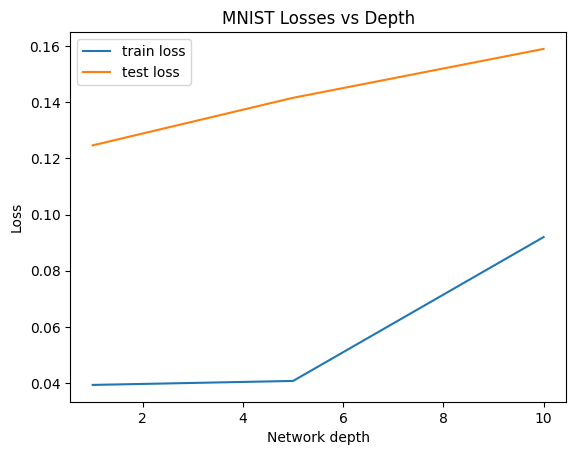

In [9]:
plt.title("MNIST Losses vs Depth")
train_error = [errors[d][0] for d in depths]
test_error = [errors[d][1] for d in depths]
plt.plot(depths, train_error, label="train loss")
plt.plot(depths, test_error, label="test loss")
plt.legend()
plt.xlabel("Network depth")
plt.ylabel("Loss")

#### Task 9 - Wide Networks Analysis

In [10]:
# Fixed Hyperparameters:
hyperparams = {
    "dataset_type": "mnist",
    "depth": 1,
    "criterion": nn.CrossEntropyLoss(),
    "optimizer": optim.Adam,
    "batch_size": 64,
    "lr": 0.001,
    "max_epoch": 1,
    "normalize": True
}

widths = [2 ** i for i in range(2, 11)]
errors = {}
for w in widths:
    hyperparams["width"] = w
    mnist_net = NeuralNetworkTrainer(**hyperparams)

    errors[w] = mnist_net.train_me(logs=False)
    print(f"Width: {w} | Train Loss: {errors[w][0]:.04} | "
          f"Test Loss: {errors[w][1]:.04}")


<ipython-input-4-e6f0142d11a9>:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.data = torch.tensor(self.data, dtype=torch.float32)            # Casting to float to prevent future problems.


Width: 4 | Train Loss: 1.086 | Test Loss: 1.073
Width: 8 | Train Loss: 0.6269 | Test Loss: 0.6096
Width: 16 | Train Loss: 0.4275 | Test Loss: 0.4223
Width: 32 | Train Loss: 0.3448 | Test Loss: 0.3386
Width: 64 | Train Loss: 0.309 | Test Loss: 0.3105
Width: 128 | Train Loss: 0.2734 | Test Loss: 0.2795
Width: 256 | Train Loss: 0.2283 | Test Loss: 0.2363
Width: 512 | Train Loss: 0.1956 | Test Loss: 0.2132
Width: 1024 | Train Loss: 0.1733 | Test Loss: 0.1923


(0.1, 0.5)

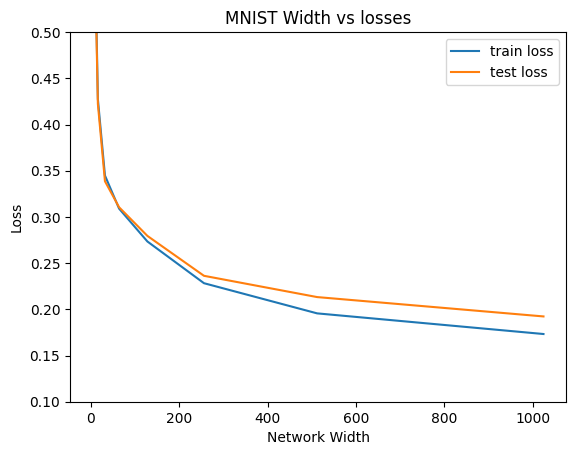

In [11]:
plt.title("MNIST Width vs losses")
train_error = [errors[w][0] for w in widths]
test_error = [errors[w][1] for w in widths]
plt.plot(widths, train_error, label="train loss", log)
plt.plot(widths, test_error, label="test loss")
plt.legend()
plt.xlabel("Network Width")
plt.ylabel("Loss")
plt.ylim([0.1, 0.5])

***
***

## Part 4: The link between Neural Networks and Gaussian Processes [8 points]

### Part 4.1: Proving the relationship between a Gaussian process and a neural network [4 points]

### Task 1: Proper weight scaling

The scaling makes sense because we want to employ the Central Limit Theorm on $f_i^{(2)}(x)$. CLT states that the sum of $N$ i.i.d r.v. $X_i, ... ,X_N $ with mean and variance $\mu, \sigma^2$ distributes (approx.) as $\mathcal{N}(N \mu, N \sigma^2)$. In our case, the mean $\mathbb{E}[f_i^{(2)}]=0$ and the variance depends on the variance of the wieghts $w_{ij}^{(2)}$ (more details below). Then, in order to keep the variance from diverging as $N_1 \rightarrow \infty$ and apply CLT, we have to normalize the variance of the wieghts by $N_1$.

### Task 2: Derive the GP relation for a single hidden layer

We will use similar notation to [Matthews et al., 2018]. Consider two inputs $x, x'$, and define the vector $\boldsymbol{f}^{(2)}(x)$ with elements $f^{(2)}_i(x)\, , i=1,...,N_2$. Then we define the vector $\boldsymbol{F}^{(2)}$ with lemgth $2N_2$ as the concatenation of $\boldsymbol{f}^{(2)}(x), \boldsymbol{f}^{(2)}(x')$:

$$
\boldsymbol{F}^{(2)} = \begin{pmatrix} \boldsymbol{f}^{(2)}(x) \\ \boldsymbol{f}^{(2)}(x') \end{pmatrix} = \begin{pmatrix} \boldsymbol{b}^{(2)} \\ \boldsymbol{b}^{(2)} \end{pmatrix} + ∑_{j=1}^{N_1} \begin{pmatrix} w^{(2)}_{:, j}g_j(x) \\ w^{(2)}_{:, j}g_j(x') \end{pmatrix}
$$

where the sum over $w^{(2)}_{:, j}$ means that it applies for every neuron $1 \le i \le N_{1}$.

Now we want to show that the two vectors $\boldsymbol{f}^{(2)}(x), \boldsymbol{f}^{(2)}(x')$ are i.i.d. The bias terms are the obvious, and for the summation, note that we have the exact same expression and same r.v. (i.e. same $w_{i,j}$ and $g_j$ which are all independent), except for different inputs. Therefore, conditional on the inputs, these are i.i.d.

<font color='red'>conditional on inputs??</font>


Next, we want to apply multivariate CLT. Formally we can do that because the mean is zero and we normalized the variance, so the variance does not diverge (as explained above). Also, $\boldsymbol{F}^{(2)}$ is a vector of i.i.d r.v., as stated before. To find the limit distribution we calculate:

Using linearity of expectetion and independence,
$$
\mathbb{E}[f_i^{(2)}(x)]= ∑_i^{N_1}\mathbb{E}[w_{i,j}g_j(x)] + \mathbb{E}[b_i]= ∑_i^{N_1} 0 \cdot \mathbb{E}[g_j(x)] + 0 = 0\, .
$$

Then,
$$
\mu^1 := \mathbb{E}[\boldsymbol{F}^{(2)}] = \boldsymbol{0} \, .
$$

The covariance matrix denoted by $K^1$ would be given by:
$$
K^1_{i,j} = \mathbb{E} \left[ (f_i^{(2)} - \mathbb{E}[f_i^{(2)}]) ⋅ (f_j^{(2)} - \mathbb{E}[f_j^{(2)}]) \right] = \mathbb{E} \left[ (f_i^{(2)}) ⋅ (f_j^{(2)}) \right] \, .
$$

Finally, multivariate CLT gives:
$$
\boldsymbol{F}^{(2)} \xrightarrow{N_1 \rightarrow ∞} \mathcal{N}(\boldsymbol{0}, K^1)\, ,
$$

which means that the limiting distribution is a Gaussian Process.

### Task 3: Why in succession

### Task 4: Derive the GP relation for multiple hidden layers

***

### Part 4.2: Analysing the performance of the Gaussian process and a neural network [4 points]

In [12]:
# Please use float64 as default dtype for this part of the assignment
torch.set_default_dtype(torch.float64)

# Another hint: when  computing [ K^L(X,X) + noise^2 Id ]^-1 y and  [ K^L(X,X) + noise^2 Id ]^-1 K^L(X,X*)
# You can TRY cholesky solve as it should be p.d. (except case for numerical errors) - maybe you can use try:/except:
# You can also try to enforce symmetry in posterior covariance by doing (K + K.t())/2

In [13]:
# You can of course add more cells of both code and markdown.